# Volkswagen Stock Price

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sn
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.api import VAR
import yfinance
import warnings
warnings.filterwarnings('ignore')
sns.set()

### Importing the Data

In [2]:
raw_data = yfinance.download(tickers = "VOW.DE, PAH3.DE, BMW.DE", interval = '1d', group_by = 'ticker', 
                             auto_adjust=True, treads=True)
df = raw_data.copy()

[*********************100%***********************]  3 of 3 completed


In [3]:
df.head()

PAH3.DE                       BMW.DE                        \
              Open High Low Close Volume   Open High Low Close Volume   
Date                                                                    
1995-03-29     NaN  NaN NaN   NaN    NaN    NaN  NaN NaN   NaN    NaN   
1995-03-30     NaN  NaN NaN   NaN    NaN    NaN  NaN NaN   NaN    NaN   
1995-03-31     NaN  NaN NaN   NaN    NaN    NaN  NaN NaN   NaN    NaN   
1995-04-03     NaN  NaN NaN   NaN    NaN    NaN  NaN NaN   NaN    NaN   
1995-04-04     NaN  NaN NaN   NaN    NaN    NaN  NaN NaN   NaN    NaN   

               VOW.DE                                          
                 Open       High        Low      Close Volume  
Date                                                           
1995-03-29  10.457071  10.457071  10.457071  10.457071      0  
1995-03-30  10.441509  10.814450  10.441509  10.783332     10  
1995-03-31  10.783332  10.783332  10.783332  10.783332      0  
1995-04-03  10.783332  10.783332  10.783332  10.783332      0  
1995-04-04  10.783332  10.783332  10.783332  10.783332      0

In [4]:
df.tail()

PAH3.DE                                                 BMW.DE  \
                 Open       High        Low      Close     Volume       Open   
Date                                                                           
2022-11-08  58.439999  59.180000  57.340000  57.340000   696449.0  81.000000   
2022-11-09  57.340000  58.279999  56.320000  57.180000   632150.0  80.790001   
2022-11-10  56.860001  58.680000  56.020000  58.660000  1246970.0  80.000000   
2022-11-11  59.400002  61.180000  59.279999  59.759998  1668596.0  83.730003   
2022-11-14  60.480000  60.799999  59.020000  59.080002   166764.0  84.760002   

                                                            VOW.DE  \
                 High        Low      Close     Volume        Open   
Date                                                                 
2022-11-08  81.190002  80.389999  80.489998  1326961.0  181.600006   
2022-11-09  80.870003  79.370003  80.250000  1161232.0  178.949997   
2022-11-10  83.300003  79.900002  82.849998  1726552.0  178.000000   
2022-11-11  84.330002  83.260002  84.239998  1457198.0  185.000000   
2022-11-14  85.260002  84.129997  84.650002   264607.0  190.000000   

                                                       
                  High         Low       Close Volume  
Date                                                   
2022-11-08  182.399994  179.750000  180.149994  27414  
2022-11-09  181.199997  177.699997  179.750000  28914  
2022-11-10  184.899994  176.850006  184.300003  46332  
2022-11-11  191.399994  184.750000  190.500000  40191  
2022-11-14  191.949997  189.199997  189.750000  14392

### Defining Key Dates

In [5]:
start_date = '2009-04-05'
date1 = '2009-12-09'
date2 = '2012-07-05'
end_date = '2014-01-01'
diseal_gate = '2015-09-20'

### Pre-Processing the data

In [6]:
#Extracting Closing Prices
df['vol'] = df['VOW.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

In [7]:
#Creating Returns
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

In [8]:
#Creating squared returns
df['sq_ret_vol'] = df.ret_vol.mul(df.ret_vol)
df['sq_ret_por'] = df.ret_por.mul(df.ret_por)
df['sq_ret_bmw'] = df.ret_bmw.mul(df.ret_bmw)

In [9]:
#Extracting Volume
df['q_vol'] = df['VOW.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume

In [10]:
df.tail()

PAH3.DE                                                 BMW.DE  \
                 Open       High        Low      Close     Volume       Open   
Date                                                                           
2022-11-08  58.439999  59.180000  57.340000  57.340000   696449.0  81.000000   
2022-11-09  57.340000  58.279999  56.320000  57.180000   632150.0  80.790001   
2022-11-10  56.860001  58.680000  56.020000  58.660000  1246970.0  80.000000   
2022-11-11  59.400002  61.180000  59.279999  59.759998  1668596.0  83.730003   
2022-11-14  60.480000  60.799999  59.020000  59.080002   166764.0  84.760002   

                                                        ...        bmw  \
                 High        Low      Close     Volume  ...              
Date                                                    ...              
2022-11-08  81.190002  80.389999  80.489998  1326961.0  ...  80.489998   
2022-11-09  80.870003  79.370003  80.250000  1161232.0  ...  80.250000   
2022-11-10  83.300003  79.900002  82.849998  1726552.0  ...  82.849998   
2022-11-11  84.330002  83.260002  84.239998  1457198.0  ...  84.239998   
2022-11-14  85.260002  84.129997  84.650002   264607.0  ...  84.650002   

             ret_vol   ret_por   ret_bmw sq_ret_vol sq_ret_por sq_ret_bmw  \
                                                                            
Date                                                                        
2022-11-08 -0.552029 -1.680383 -0.666421   0.304736   2.823688   0.444117   
2022-11-09 -0.222034 -0.279037 -0.298171   0.049299   0.077862   0.088906   
2022-11-10  2.531295  2.588317  3.239873   6.407455   6.699384  10.496780   
2022-11-11  3.364079  1.875210  1.677730  11.317025   3.516414   2.814778   
2022-11-14 -0.393701 -1.137879  0.486709   0.155000   1.294769   0.236886   

            q_vol      q_por      q_bmw  
                                         
Date                                     
2022-11-08  27414   696449.0  1326961.0  
2022-11-09  28914   632150.0  1161232.0  
2022-11-10  46332  1246970.0  1726552.0  
2022-11-11  40191  1668596.0  1457198.0  
2022-11-14  14392   166764.0   264607.0  

[5 rows x 27 columns]

In [11]:
# Assigning frequency
df = df.asfreq('b')
df = df.fillna(method='bfill')

In [12]:
del df['VOW.DE']
del df['PAH3.DE']
del df['BMW.DE']

In [13]:
df.tail()

,vol,por,bmw,ret_vol,ret_por,ret_bmw,sq_ret_vol,sq_ret_por,sq_ret_bmw,q_vol,q_por,q_bmw
,,,,,,,,,,,,
Date,,,,,,,,,,,,
2022-11-08,180.149994,57.340000,80.489998,-0.552029,-1.680383,-0.666421,0.304736,2.823688,0.444117,27414.0,696449.0,1326961.0
2022-11-09,179.750000,57.180000,80.250000,-0.222034,-0.279037,-0.298171,0.049299,0.077862,0.088906,28914.0,632150.0,1161232.0
2022-11-10,184.300003,58.660000,82.849998,2.531295,2.588317,3.239873,6.407455,6.699384,10.496780,46332.0,1246970.0,1726552.0
2022-11-11,190.500000,59.759998,84.239998,3.364079,1.875210,1.677730,11.317025,3.516414,2.814778,40191.0,1668596.0,1457198.0
2022-11-14,189.750000,59.080002,84.650002,-0.393701,-1.137879,0.486709,0.155000,1.294769,0.236886,14392.0,166764.0,264607.0


In [14]:
df.isna().sum()

vol             0
por             0
bmw             0
ret_vol         0
ret_por         0
ret_bmw         0
sq_ret_vol      0
sq_ret_por      0
sq_ret_bmw      0
q_vol           0
q_por           0
q_bmw           0
dtype: int64

### Plotting the prices

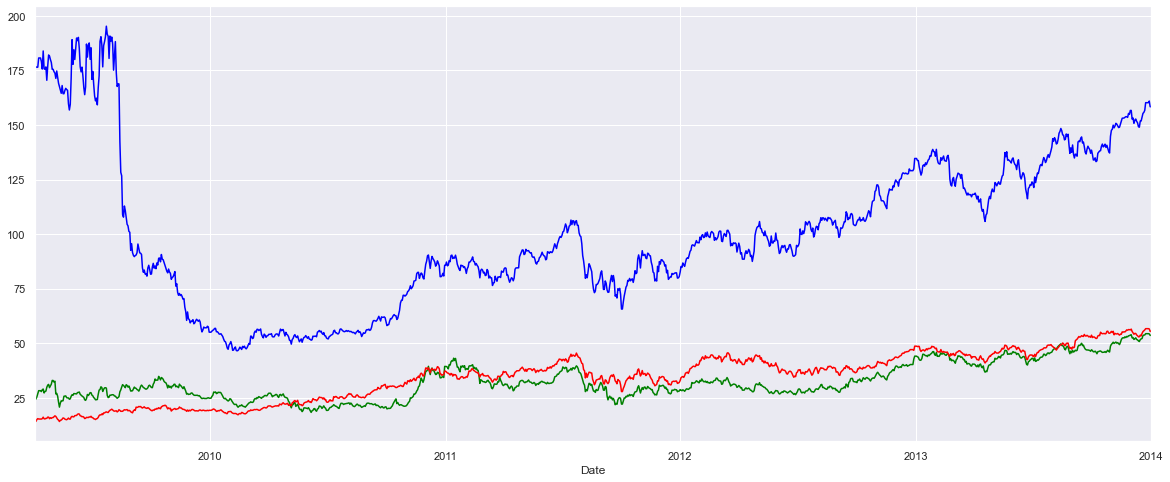

In [15]:
df['vol'][start_date:end_date].plot(figsize=(20,8), color="blue")
df['por'][start_date:end_date].plot(color="green")
df['bmw'][start_date:end_date].plot(color="red")
plt.show()

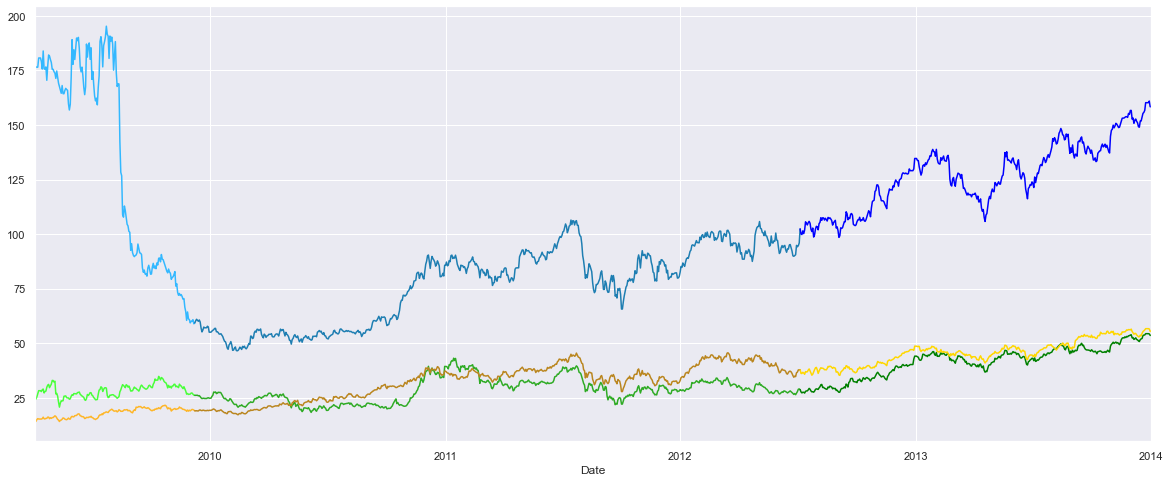

In [16]:
df['vol'][start_date:date1].plot(figsize=(20,8), color="#33B8FF")
df['por'][start_date:date1].plot(color="#49FF3A")
df['bmw'][start_date:date1].plot(color="#FEB628")

df['vol'][date1:date2].plot(color="#1E7EB2")
df['por'][date1:date2].plot(color="#2FAB25")
df['bmw'][date1:date2].plot(color="#BA861F")

df['vol'][date2:end_date].plot(color="blue")
df['por'][date2:end_date].plot(color="green")
df['bmw'][date2:end_date].plot(color="gold")
plt.show()

### Correlation

In [17]:
print('Correlation among manufacturers from ' + str(start_date)+ ' to '+ str(end_date) + '\n')
print('Volkswagen  & Porsche correlation : \t' + str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
print('Volkswagen  & BMW correlation : \t' + str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print('BMW  & Porsche correlation : \t' + str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

Correlation among manufacturers from 2009-04-05 to 2014-01-01

Volkswagen  & Porsche correlation : 	0.5841634995084324
Volkswagen  & BMW correlation : 	0.3323096824604794
BMW  & Porsche correlation : 	0.8052157926674712


In [18]:
print('Correlation among manufacturers from ' + str(start_date)+ ' to '+ str(date1) + '\n')
print('Volkswagen  & Porsche correlation : \t' + str(df['vol'][start_date:date1].corr(df['por'][start_date:date1])))
print('Volkswagen  & BMW correlation : \t' + str(df['vol'][start_date:date1].corr(df['bmw'][start_date:date1])))
print('BMW  & Porsche correlation : \t' + str(df['por'][start_date:date1].corr(df['bmw'][start_date:date1])))

Correlation among manufacturers from 2009-04-05 to 2009-12-09

Volkswagen  & Porsche correlation : 	-0.506392320104365
Volkswagen  & BMW correlation : 	-0.7689439626240212
BMW  & Porsche correlation : 	0.6095038652799962


In [19]:
print('Correlation among manufacturers from ' + str(date1)+ ' to '+ str(date2) + '\n')
print('Volkswagen  & Porsche correlation : \t' + str(df['vol'][date1:date2].corr(df['por'][date1:date2])))
print('Volkswagen  & BMW correlation : \t' + str(df['vol'][date1:date2].corr(df['bmw'][date1:date2])))
print('BMW  & Porsche correlation : \t' + str(df['por'][date1:date2].corr(df['bmw'][date1:date2])))

Correlation among manufacturers from 2009-12-09 to 2012-07-05

Volkswagen  & Porsche correlation : 	0.7759152082692528
Volkswagen  & BMW correlation : 	0.9603532849309289
BMW  & Porsche correlation : 	0.7042723630141252


In [20]:
print('Correlation among manufacturers from ' + str(date2)+ ' to '+ str(end_date) + '\n')
print('Volkswagen  & Porsche correlation : \t' + str(df['vol'][date2:end_date].corr(df['por'][date2:end_date])))
print('Volkswagen  & BMW correlation : \t' + str(df['vol'][date2:end_date].corr(df['bmw'][date2:end_date])))
print('BMW  & Porsche correlation : \t' + str(df['por'][date2:end_date].corr(df['bmw'][date2:end_date])))

Correlation among manufacturers from 2012-07-05 to 2014-01-01

Volkswagen  & Porsche correlation : 	0.9627375927082729
Volkswagen  & BMW correlation : 	0.9520412272519018
BMW  & Porsche correlation : 	0.949411157063525


### VAR Model

In [33]:
df.tail()

,vol,por,bmw,ret_vol,ret_por,ret_bmw,sq_ret_vol,sq_ret_por,sq_ret_bmw,q_vol,q_por,q_bmw
,,,,,,,,,,,,
Date,,,,,,,,,,,,
2022-11-08,180.149994,57.340000,80.489998,-0.552029,-1.680383,-0.666421,0.304736,2.823688,0.444117,27414.0,696449.0,1326961.0
2022-11-09,179.750000,57.180000,80.250000,-0.222034,-0.279037,-0.298171,0.049299,0.077862,0.088906,28914.0,632150.0,1161232.0
2022-11-10,184.300003,58.660000,82.849998,2.531295,2.588317,3.239873,6.407455,6.699384,10.496780,46332.0,1246970.0,1726552.0
2022-11-11,190.500000,59.759998,84.239998,3.364079,1.875210,1.677730,11.317025,3.516414,2.814778,40191.0,1668596.0,1457198.0
2022-11-14,189.750000,59.080002,84.650002,-0.393701,-1.137879,0.486709,0.155000,1.294769,0.236886,14392.0,166764.0,264607.0


In [58]:
df_ret = df[['ret_vol','ret_por','ret_bmw']][start_date:end_date]
df_ret

,ret_vol,ret_por,ret_bmw
,,,
Date,,,
2009-04-06,1.099845,3.322337,-7.761810
2009-04-07,-0.196665,-2.668190,-4.417368
2009-04-08,-0.138346,4.193995,6.168987
2009-04-09,0.062975,5.576806,2.501460
2009-04-10,2.370466,5.154410,-1.056847
...,...,...,...
2013-12-26,2.243094,1.120444,1.028979
2013-12-27,2.243094,1.120444,1.028979


In [41]:
df_ret_train = df_ret[:date2]
df_ret_test = df_ret[date2:]

In [42]:
model_var_ret = VAR(df_ret_train)
model_var_ret.select_order(20)
results_var_ret = model_var_ret.fit(ic='aic')

In [43]:
results_var_ret.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 14, Nov, 2022
Time:                     17:52:18
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    4.75321
Nobs:                     848.000    HQIC:                   4.71181
Log likelihood:          -5584.68    FPE:                    108.429
AIC:                      4.68609    Det(Omega_mle):         106.909
--------------------------------------------------------------------
Results for equation ret_vol
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.068311         0.088313           -0.774           0.439
L1.ret_vol         0.013119         0.044796            0.293           0.770
L1.ret_por         0.010395         0.038110            0.273         

In [44]:
results_var_ret.k_ar

1

In [45]:
lag_order_ret = results_var_ret.k_ar

In [47]:
var_pred_ret = results_var_ret.forecast(df_ret_train.values[-lag_order_ret:], len(df_ret_test))

In [49]:
df_ret_pred=pd.DataFrame(data=var_pred_ret,index=df_ret_test.index)

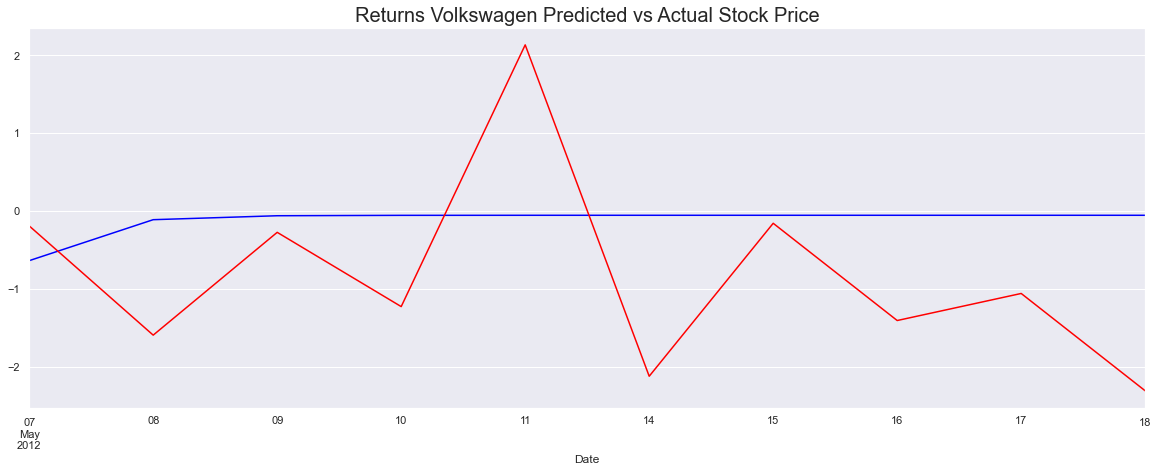

In [96]:
df_ret_pred[0][:10].plot(figsize=(20,7), color='blue')
df_ret_test['ret_vol'][:10].plot(color='red')
plt.title('Returns Volkswagen Predicted vs Actual Stock Price', fontsize= 20)
plt.show()

### VAR Model forecast till '2012-07-05'

In [71]:
date2

'2012-07-05'

In [72]:
particular_date='2012-05-05'

In [73]:
df.tail()

,vol,por,bmw,ret_vol,ret_por,ret_bmw,sq_ret_vol,sq_ret_por,sq_ret_bmw,q_vol,q_por,q_bmw
,,,,,,,,,,,,
Date,,,,,,,,,,,,
2022-11-08,180.149994,57.340000,80.489998,-0.552029,-1.680383,-0.666421,0.304736,2.823688,0.444117,27414.0,696449.0,1326961.0
2022-11-09,179.750000,57.180000,80.250000,-0.222034,-0.279037,-0.298171,0.049299,0.077862,0.088906,28914.0,632150.0,1161232.0
2022-11-10,184.300003,58.660000,82.849998,2.531295,2.588317,3.239873,6.407455,6.699384,10.496780,46332.0,1246970.0,1726552.0
2022-11-11,190.500000,59.759998,84.239998,3.364079,1.875210,1.677730,11.317025,3.516414,2.814778,40191.0,1668596.0,1457198.0
2022-11-14,189.750000,59.080002,84.650002,-0.393701,-1.137879,0.486709,0.155000,1.294769,0.236886,14392.0,166764.0,264607.0


In [74]:
df_ret = df[['ret_vol','ret_por','ret_bmw']][start_date:date2]
df_ret

,ret_vol,ret_por,ret_bmw
,,,
Date,,,
2009-04-06,1.099845,3.322337,-7.761810
2009-04-07,-0.196665,-2.668190,-4.417368
2009-04-08,-0.138346,4.193995,6.168987
2009-04-09,0.062975,5.576806,2.501460
2009-04-10,2.370466,5.154410,-1.056847
...,...,...,...
2012-06-29,4.713661,2.621555,5.114484
2012-07-02,-0.673112,2.720659,0.843140


In [75]:
df_ret_train = df_ret[:particular_date]
df_ret_test = df_ret[particular_date:]

In [76]:
model_var_ret_pre = VAR(df_ret_train)
model_var_ret_pre.select_order(20)
results_var_ret_pre = model_var_ret_pre.fit(ic='aic')

In [77]:
results_var_ret_pre.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 14, Nov, 2022
Time:                     18:08:28
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    4.83184
Nobs:                     804.000    HQIC:                   4.78873
Log likelihood:          -5324.74    FPE:                    116.962
AIC:                      4.76185    Det(Omega_mle):         115.233
--------------------------------------------------------------------
Results for equation ret_vol
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.075940         0.091516           -0.830           0.407
L1.ret_vol         0.016341         0.045518            0.359           0.720
L1.ret_por         0.004992         0.038651            0.129         

In [78]:
results_var_ret_pre.k_ar

1

In [79]:
lag_order_ret = results_var_ret_pre.k_ar

In [80]:
var_pred_ret = results_var_ret_pre.forecast(df_ret_train.values[-lag_order_ret:], len(df_ret_test))

In [90]:
df_ret_pred=pd.DataFrame(data=var_pred_ret,index=df_ret_test.index)
df_ret_pred.head(10)

,0,1,2
Date,,,
2012-05-07,-0.640540,-0.611059,-0.189476
2012-05-08,-0.114606,-0.025606,0.105680
2012-05-09,-0.063915,0.065967,0.134199
2012-05-10,-0.058844,0.080753,0.138077
2012-05-11,-0.058173,0.083230,0.138714
2012-05-14,-0.058065,0.083651,0.138823
2012-05-15,-0.058046,0.083723,0.138842
2012-05-16,-0.058043,0.083735,0.138845
2012-05-17,-0.058043,0.083737,0.138846


In [91]:
df_ret_test.head(10)

,ret_vol,ret_por,ret_bmw
,,,
Date,,,
2012-05-07,-0.194325,0.673977,1.536456
2012-05-08,-1.596558,-1.997357,-3.854389
2012-05-09,-0.277009,-0.559915,0.519660
2012-05-10,-1.230175,-1.193702,-2.156562
2012-05-11,2.129377,-0.159573,2.053136
2012-05-14,-2.124308,-2.054785,-1.715961
2012-05-15,-0.160767,-0.699304,-0.406378
2012-05-16,-1.409014,-1.830980,0.544054


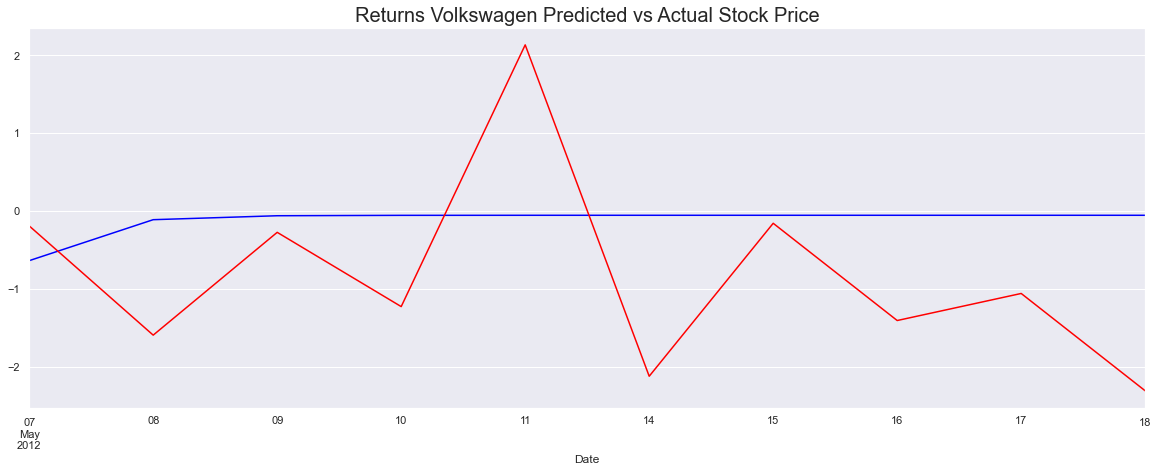

In [97]:
df_ret_pred[0][:10].plot(figsize=(20,7), color='blue')
df_ret_test['ret_vol'][:10].plot(color='red')
plt.title('Returns Volkswagen Predicted vs Actual Stock Price', fontsize= 20)
plt.show()

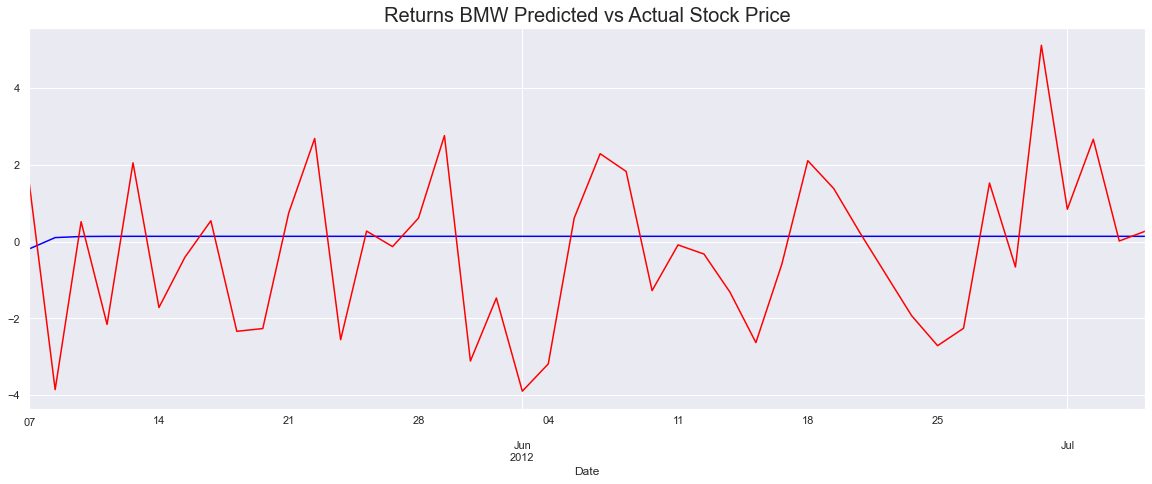

In [98]:
df_ret_pred[2].plot(figsize=(20,7), color='blue')
df_ret_test['ret_bmw'].plot(color='red')
plt.title('Returns BMW Predicted vs Actual Stock Price', fontsize= 20)
plt.show()

### VAR Model forecast till '2009-12-09'

In [99]:
end_date

'2014-01-01'

In [145]:
particular_date='2013-10-01'

In [146]:
df.tail()

,vol,por,bmw,ret_vol,ret_por,ret_bmw,sq_ret_vol,sq_ret_por,sq_ret_bmw,q_vol,q_por,q_bmw
,,,,,,,,,,,,
Date,,,,,,,,,,,,
2022-11-08,180.149994,57.340000,80.489998,-0.552029,-1.680383,-0.666421,0.304736,2.823688,0.444117,27414.0,696449.0,1326961.0
2022-11-09,179.750000,57.180000,80.250000,-0.222034,-0.279037,-0.298171,0.049299,0.077862,0.088906,28914.0,632150.0,1161232.0
2022-11-10,184.300003,58.660000,82.849998,2.531295,2.588317,3.239873,6.407455,6.699384,10.496780,46332.0,1246970.0,1726552.0
2022-11-11,190.500000,59.759998,84.239998,3.364079,1.875210,1.677730,11.317025,3.516414,2.814778,40191.0,1668596.0,1457198.0
2022-11-14,189.750000,59.080002,84.650002,-0.393701,-1.137879,0.486709,0.155000,1.294769,0.236886,14392.0,166764.0,264607.0


In [147]:
df_ret = df[['ret_vol','ret_por','ret_bmw']][date2:end_date]
df_ret

,ret_vol,ret_por,ret_bmw
,,,
Date,,,
2012-07-05,6.694396,-1.238685,0.271399
2012-07-06,-2.299309,-3.642057,-4.550843
2012-07-09,-0.199441,-1.551944,-0.053157
2012-07-10,1.678654,1.182275,1.525100
2012-07-11,-1.257867,-0.238709,-0.978177
...,...,...,...
2013-12-26,2.243094,1.120444,1.028979
2013-12-27,2.243094,1.120444,1.028979


In [148]:
df_ret_train = df_ret[:particular_date]
df_ret_test = df_ret[particular_date:]

In [149]:
model_var_ret_post = VAR(df_ret_train)
model_var_ret_post.select_order(20)
results_var_ret_post = model_var_ret_post.fit(ic='aic')

In [150]:
results_var_ret_post.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 14, Nov, 2022
Time:                     18:26:03
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    1.57744
Nobs:                     323.000    HQIC:                   1.49312
Log likelihood:          -1595.04    FPE:                    4.20847
AIC:                      1.43709    Det(Omega_mle):         4.05591
--------------------------------------------------------------------
Results for equation ret_vol
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.107483         0.091617            1.173           0.241
L1.ret_vol        -0.035076         0.084672           -0.414           0.679
L1.ret_por         0.100984         0.080693            1.251         

In [151]:
results_var_ret_post.k_ar

1

In [152]:
lag_order_ret = results_var_ret_post.k_ar

In [154]:
var_pred_ret = results_var_ret_post.forecast(df_ret_train.values[-lag_order_ret:], len(df_ret_test))

In [155]:
df_ret_pred=pd.DataFrame(data=var_pred_ret,index=df_ret_test.index)
df_ret_pred.head(10)

,0,1,2
Date,,,
2013-10-01,0.268651,0.431856,0.482217
2013-10-02,0.155200,0.265805,0.242157
2013-10-03,0.135676,0.235233,0.195440
2013-10-04,0.131962,0.229220,0.186019
2013-10-07,0.131221,0.228002,0.184091
2013-10-08,0.131070,0.227752,0.183694
2013-10-09,0.131039,0.227701,0.183612
2013-10-10,0.131033,0.227690,0.183595
2013-10-11,0.131031,0.227688,0.183591


In [156]:
df_ret_test.head(10)

,ret_vol,ret_por,ret_bmw
,,,
Date,,,
2013-10-01,1.043854,1.455111,1.811998
2013-10-02,-1.446297,-0.823948,-1.989874
2013-10-03,-1.826879,-1.153828,0.479209
2013-10-04,-1.826879,-1.153828,0.479209
2013-10-07,0.732147,0.622579,-0.640079
2013-10-08,-1.302233,-0.959021,-0.694696
2013-10-09,0.306822,-1.608612,0.228945
2013-10-10,2.569600,2.126981,2.005081


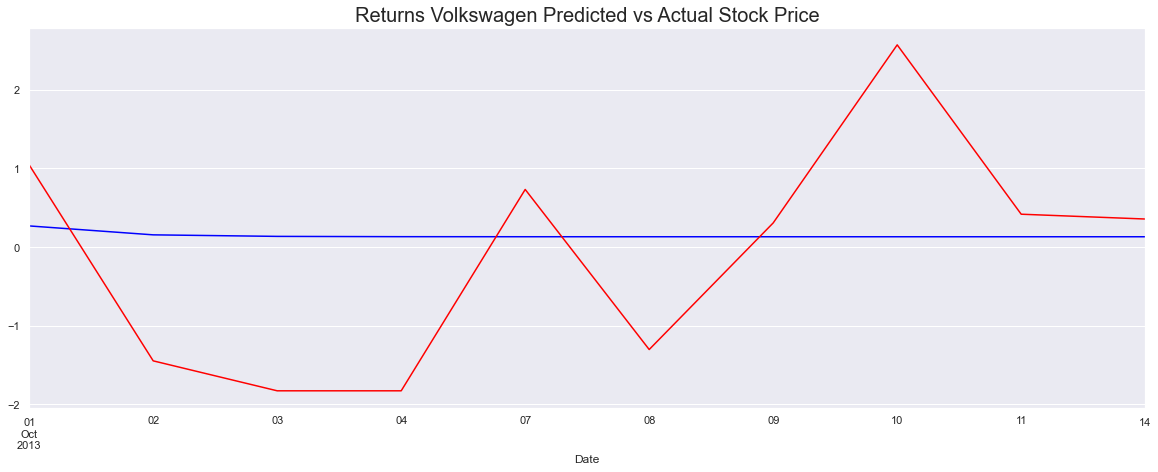

In [157]:
df_ret_pred[0][:10].plot(figsize=(20,7), color='blue')
df_ret_test['ret_vol'][:10].plot(color='red')
plt.title('Returns Volkswagen Predicted vs Actual Stock Price', fontsize= 20)
plt.show()

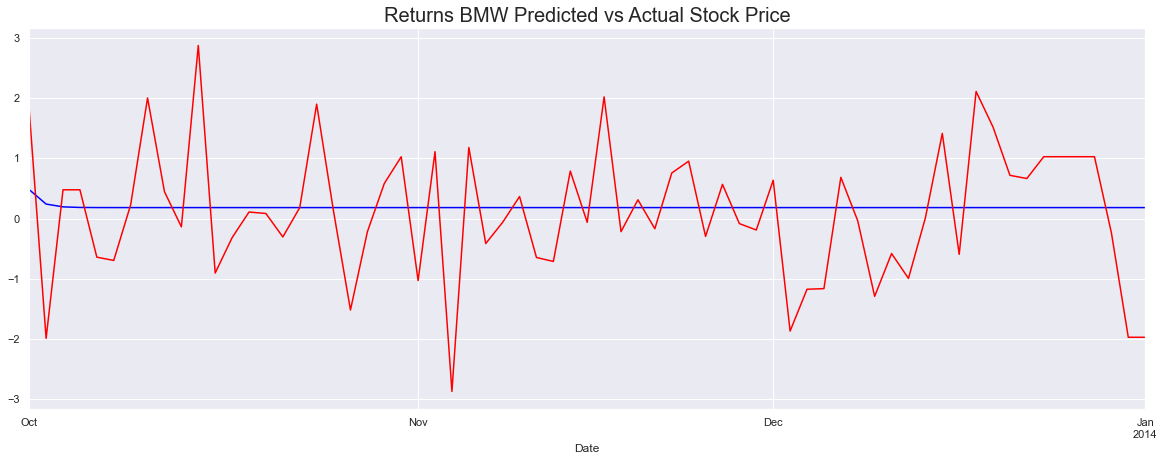

In [158]:
df_ret_pred[2].plot(figsize=(20,7), color='blue')
df_ret_test['ret_bmw'].plot(color='red')
plt.title('Returns BMW Predicted vs Actual Stock Price', fontsize= 20)
plt.show()